In [1]:
pip install -U scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data load and preprocessing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.drop('customerID', axis=1, inplace=True)
df.head(7043)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
# Encode categorical variables
# Convert binary columns to 0 and 1
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

In [9]:
df['tenure'] = df['tenure'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(float)
df['gender'] = df['gender'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['Partner'] = df['Partner'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)
df['PhoneService'] = df['PhoneService'].astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)
df['Churn'] = df['Churn'].astype(int)

In [10]:
#One-hot encode categorical columns with more than two categories
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                 'Contract', 'PaymentMethod'], drop_first=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [12]:
# define feature and target
X = df.drop('Churn', axis=1)
y = df['Churn']
# convert data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
# train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [19]:
# # evaluate the model
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
# from sklearn.model_selection import GridSearchCV
# y_pred = model.predict(X_test)
# # Evaluate the model
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # 1. Fine-Tune Decision Threshold
# def evaluate_with_threshold(model, X_test, y_test, threshold=0.5):
#     # Get probability predictions
#     y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (churn)
    
#     # Apply custom threshold
#     y_pred_threshold = (y_prob >= threshold).astype(int)
    
#     # Evaluation metrics
#     precision = precision_score(y_test, y_pred_threshold)
#     recall = recall_score(y_test, y_pred_threshold)
#     f1 = f1_score(y_test, y_pred_threshold)
#     conf_matrix = confusion_matrix(y_test, y_pred_threshold)

#     print(f"\nEvaluation at Threshold {threshold}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print("Confusion Matrix:\n", conf_matrix)

# # 2. Define and Fit the Base Model with Class Weights
# base_model = LogisticRegression(penalty='l1', solver='liblinear', class_weight={0: 1, 1: 2})
# base_model.fit(X_train, y_train)

# # Evaluate with default threshold
# evaluate_with_threshold(base_model, X_test, y_test, threshold=0.5)

# # # Try different thresholds
# # for threshold in [0.4, 0.5, 0.6, 0.7]:
# #     evaluate_with_threshold(base_model, X_test, y_test, threshold=threshold)

# # # 3. Hyperparameter Tuning with Grid Search
# param_grid = {
#     'C': [0.01, 0.1, 1, 10],                    # Regularization strength
#     'class_weight': [{0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 3}]  # Different class weights
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     LogisticRegression(penalty='l1', solver='liblinear'),
#     param_grid,
#     scoring='f1',     # Optimize for F1 score to balance precision and recall
#     cv=5              # 5-fold cross-validation
# )
# grid_search.fit(X_train, y_train)

# # Get the best model from grid search
# best_model = grid_search.best_estimator_
# print("\nBest Parameters from Grid Search:", grid_search.best_params_)

# # Evaluate the best model from grid search
# evaluate_with_threshold(best_model, X_test, y_test, threshold=0.5)  # Default threshold
# evaluate_with_threshold(best_model, X_test, y_test, threshold=0.6)  # Alternative threshold

# # Display final classification report and confusion matrix for best model with default threshold
# y_pred_best = (best_model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
# print("\nFinal Model Evaluation at Threshold 0.5")
# print(classification_report(y_test, y_pred_best))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Evaluation at Threshold 0.5
Precision: 0.5689
Recall: 0.7641
F1 Score: 0.6522
Confusion Matrix:
 [[820 216]
 [ 88 285]]


C:\Users\premier\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best Parameters from Grid Search: {'C': 0.1, 'class_weight': {0: 1, 1: 2}}

Evaluation at Threshold 0.5
Precision: 0.5706
Recall: 0.7587
F1 Score: 0.6513
Confusion Matrix:
 [[823 213]
 [ 90 283]]

Evaluation at Threshold 0.6
Precision: 0.6227
Recall: 0.6461
F1 Score: 0.6342
Confusion Matrix:
 [[890 146]
 [132 241]]

Final Model Evaluation at Threshold 0.5
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1036
           1       0.57      0.76      0.65       373

    accuracy                           0.78      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.78      0.79      1409

Confusion Matrix:
 [[823 213]
 [ 90 283]]


Threshold: 0.3
Precision: 0.4243, Recall: 0.9464, F1 Score: 0.5859

Threshold: 0.4
Precision: 0.4622, Recall: 0.9169, F1 Score: 0.6146

Threshold: 0.5
Precision: 0.5202, Recall: 0.8284, F1 Score: 0.6391

Threshold: 0.6
Precision: 0.5811, Recall: 0.7399, F1 Score: 0.6509

Threshold: 0.7
Precision: 0.6610, Recall: 0.6273, F1 Score: 0.6437



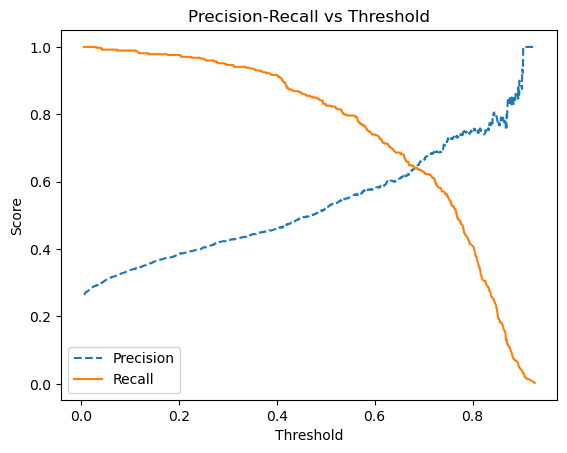

In [21]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Ensure you've trained your model and split your data into X_train, X_test, y_train, y_test
# Example: y_test should be your actual target values for the test set.

# Step 1: Get probability scores from the model (assuming `model` is already trained)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for the positive class (churn)

# Step 2: Evaluate Precision, Recall, and F1 Score across different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

# Step 3: Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(pr_thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(pr_thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

In [22]:
import pickle

# Assuming `model` is your trained model
with open("churn_model.pkl", "wb") as file:
    pickle.dump(model, file)